In [11]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
df=pd.read_csv('spam.csv',encoding_errors='ignore')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
599,ham,I'm going out to buy mum's present ar.,NaN,NaN,NaN
4731,ham,Wat time r _ going to xin's hostel?,NaN,NaN,NaN
1064,ham,"That's fine, I'll bitch at you about it later ...",NaN,NaN,NaN
2470,ham,Eat at old airport road... But now 630 oredi.....,NaN,NaN,NaN
5144,ham,I'm in office now da:)where are you?,NaN,NaN,NaN


In [12]:

#Data cleaning
# print(df.info())
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
# print(df.sample(3))
# print(df.info())
df.rename(columns={'v1':'tar','v2':'text'},inplace=True)
print(df.sample(5)) 
#check missing values
df.isnull().sum()#no missing values
#check duplicate values
df.duplicated().sum()
df=df.drop_duplicates(keep='first')


       tar                                               text
1627  spam  You have been selected to stay in 1 of 250 top...
1166   ham                     I am not having her number sir
5459   ham  If you hear a loud scream in about &lt;#&gt; m...
4488   ham           The new deus ex game comin early next yr
1531   ham    Oh dang! I didn't mean o send that to you! Lol!


In [13]:

#Exploratory Data Analysis
# print(df['tar'].value_counts())
# plt.pie(df['tar'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#print(plt.show())
#fetch no.of letters
df['no_char']=df['text'].apply(len)
#ftch no.of words
df['no_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# print(df.sample(5))
#fetch no.of sentence 
df['no_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# print(df.sample(5))
# print(df[['no_char','no_words','no_sent']].describe())
#descriptn of ham 
print(df[df['tar']=='ham'][['no_char','no_words','no_sent']].describe())
#descriptn of spam
print(df[df['tar']=='spam'][['no_char','no_words','no_sent']].describe())



           no_char     no_words      no_sent
count  4516.000000  4516.000000  4516.000000
mean     70.344110    17.108946     1.819973
std      56.328803    13.494730     1.383228
min       2.000000     1.000000     1.000000
25%      34.000000     8.000000     1.000000
50%      52.000000    13.000000     1.000000
75%      90.000000    22.000000     2.000000
max     910.000000   220.000000    38.000000
          no_char    no_words     no_sent
count  652.000000  652.000000  652.000000
mean   137.047546   27.668712    2.980061
std     29.937352    7.015283    1.491780
min     13.000000    2.000000    1.000000
25%    130.000000   25.000000    2.000000
50%    148.000000   29.000000    3.000000
75%    156.000000   32.000000    4.000000
max    222.000000   46.000000    9.000000


<AxesSubplot: xlabel='no_char', ylabel='Count'>

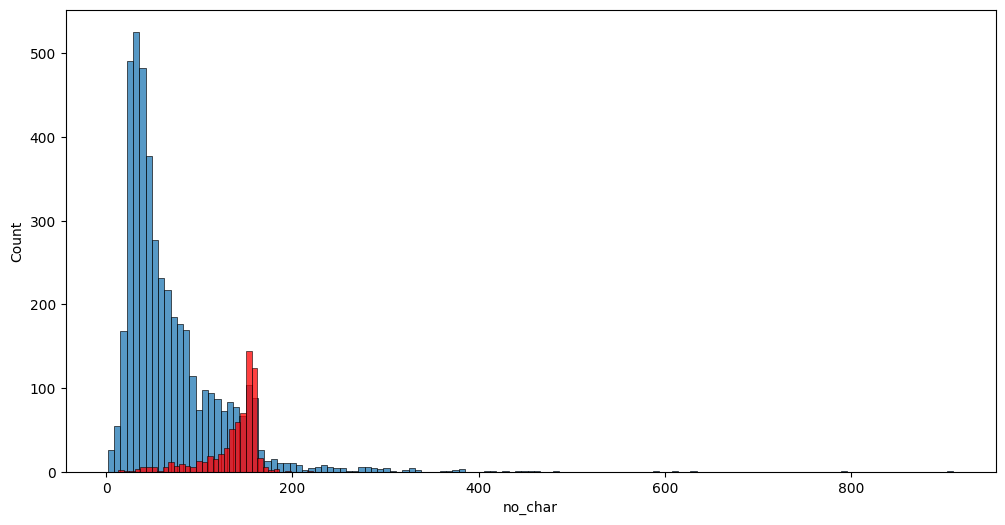

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_char'])
sns.histplot(df[df['tar']=='spam']['no_char'],color='red')

<AxesSubplot: xlabel='no_sent', ylabel='Count'>

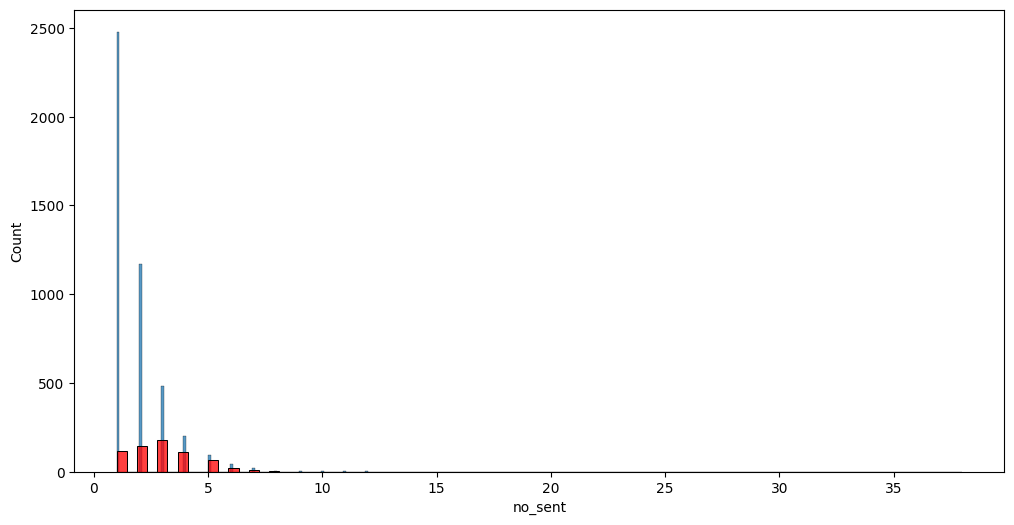

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_sent'])
sns.histplot(df[df['tar']=='spam']['no_sent'],color='red')

<AxesSubplot: xlabel='no_words', ylabel='Count'>

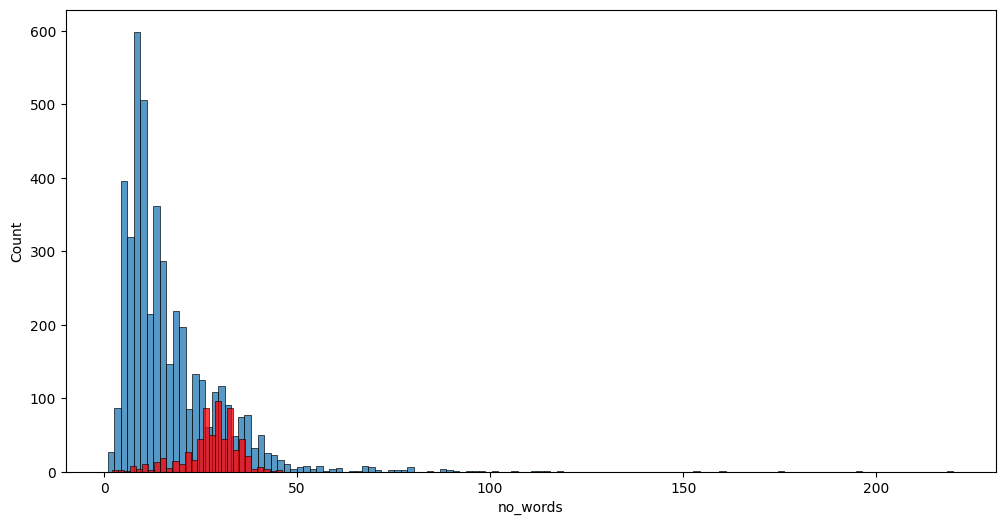

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['tar']=='ham']['no_words'])
sns.histplot(df[df['tar']=='spam']['no_words'],color='red')

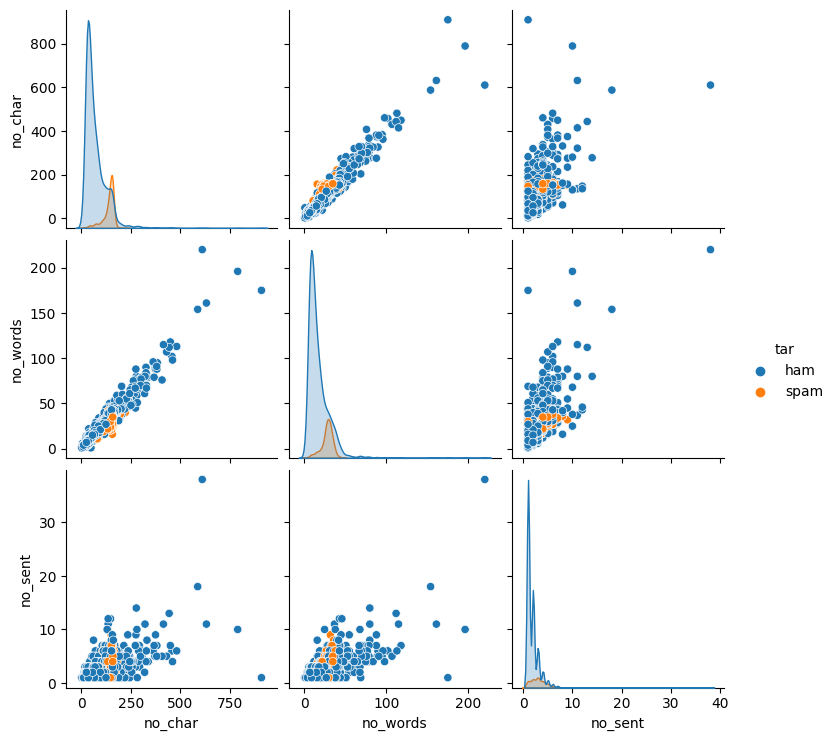

In [17]:
sns.pairplot(df,hue='tar')

In [18]:
df['tar_num']=[1 if x =='spam' else 0 for x in df['tar']]



In [19]:
df

,tar,text,no_char,no_words,no_sent,tar_num
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,159,35,4,1
5568,ham,Will _ b going to esplanade fr home?,36,9,1,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0


In [20]:
convert_dict = {'tar': object,
                'text': object,
                'no_char': int,
                'no_sent' : int,
                'no_words' : int,
                'tar_num' :int

                }
 
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tar       5168 non-null   object
 1   text      5168 non-null   object
 2   no_char   5168 non-null   int32 
 3   no_words  5168 non-null   int32 
 4   no_sent   5168 non-null   int32 
 5   tar_num   5168 non-null   int32 
dtypes: int32(4), object(2)
memory usage: 201.9+ KB


C:\Users\anvit\AppData\Local\Temp\ipykernel_11768\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

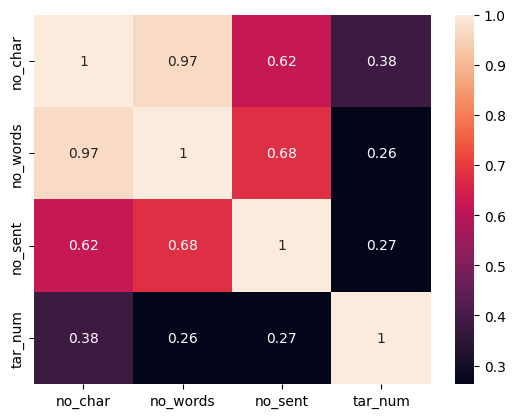

In [21]:
sns.heatmap(df.corr(),annot=True)


In [22]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)




In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
transform_text("UYgjrf yhgkurj ty8723* 93!")

'uygjrf yhgkurj ty8723 93'

In [27]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [42]:

df['transformed_text']=df['text'].apply(transform_text)

In [43]:
df

,tar,text,no_char,no_words,no_sent,tar_num,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,159,35,4,1,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,ham,Will _ b going to esplanade fr home?,36,9,1,0,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,0,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,0,guy bitch act like interest buy someth els nex...


In [49]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [51]:
wc.generate(df[df['tar_num']==1]['transformed_text'].str.cat(sep=" "))